In [1]:
import pandas as pd
import numpy as np
import pycaret
import time


In [2]:
df=pd.read_csv('olist_orders_dataset.csv')

In [3]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv') # null value exist 
orders= pd.read_csv('olist_orders_dataset.csv') # null value exist 
products = pd.read_csv('olist_products_dataset.csv') # null value exist 
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')

In [5]:
df1=pd.DataFrame(orders )  # = bydefo
df2=pd.DataFrame(order_payments)
df3 =pd.DataFrame(order_items)
df4 = pd.DataFrame(order_reviews)
df5 = pd.DataFrame(customers)
df6 = pd.DataFrame(products)
df7 = pd.DataFrame(geolocation)
df8 = pd.DataFrame(sellers)

In [6]:
df9 =pd.merge(df1,df2,on = 'order_id')
df10 =pd.merge(df3,df4,on = 'order_id')
df11 =pd.merge(df9,df10,on = 'order_id')
df12 =pd.merge(df1,df5,on = 'customer_id')
df13 =pd.merge(df11,df12,on = 'customer_id')
df14=pd.merge(df13,df6,on = 'product_id')
df15=pd.merge(df14,df8,on = 'seller_id')

In [7]:
df15.isnull().sum()

order_id_x                              0
customer_id                             0
order_status_x                          0
order_purchase_timestamp_x              0
order_approved_at_x                    15
order_delivered_carrier_date_x       1254
order_delivered_customer_date_x      2588
order_estimated_delivery_date_x         0
payment_sequential                      0
payment_type                            0
payment_installments                    0
payment_value                           0
order_item_id                           0
product_id                              0
seller_id                               0
shipping_limit_date                     0
price                                   0
freight_value                           0
review_id                               0
review_score                            0
review_comment_title               104226
review_comment_message              67650
review_creation_date                    0
review_answer_timestamp           

In [8]:
df15= df15.dropna()

In [9]:
#df16 = df15[['order_id_x','order_status_x','payment_sequential','payment_type','seller_city','seller_state']]
#df16 = df15[['order_id_x','payment_type']]


In [10]:
df15.isnull().sum()

order_id_x                         0
customer_id                        0
order_status_x                     0
order_purchase_timestamp_x         0
order_approved_at_x                0
order_delivered_carrier_date_x     0
order_delivered_customer_date_x    0
order_estimated_delivery_date_x    0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
review_id                          0
review_score                       0
review_comment_title               0
review_comment_message             0
review_creation_date               0
review_answer_timestamp            0
order_id_y                         0
order_status_y                     0
order_purchase_timestamp_y         0
o

In [11]:
from pycaret.clustering import *

In [12]:
s = setup(df15, normalize = True)


,Description,Value
0,session_id,6759
1,Original Data,"(11751, 46)"
2,Missing Values,False
3,Numeric Features,12
4,Categorical Features,21
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(11751, 70747)"
9,CPU Jobs,-1


In [13]:
kmeans = create_model('kmeans') 


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0522,468.7595,3.5693,0,0,0


In [14]:
print(kmeans) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=6759, tol=0.0001, verbose=0)


In [15]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

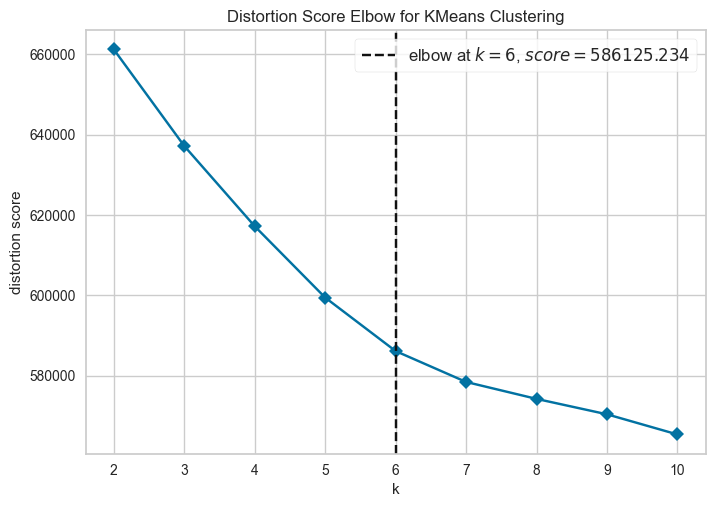

In [16]:
plot_model(kmeans, plot = 'elbow')


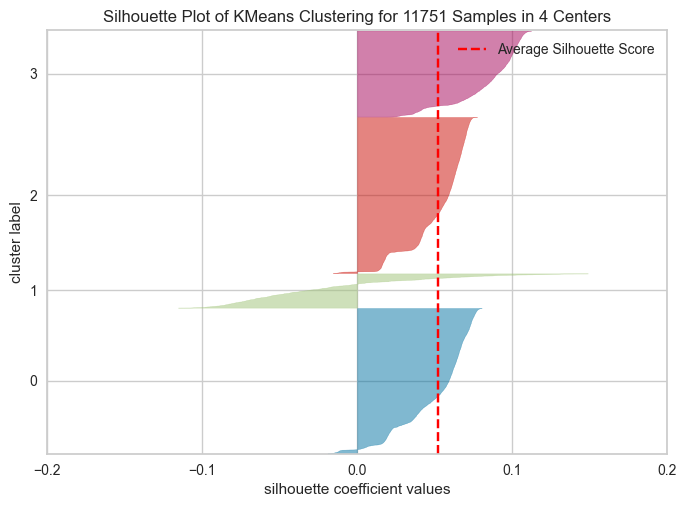

In [17]:
 plot_model(kmeans, plot = 'silhouette')


In [18]:
result = assign_model(kmeans)
result.head()



,order_id_x,customer_id,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,payment_sequential,payment_type,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,Cluster
58,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,Cluster 2
59,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,1,credit_card,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,Cluster 2
61,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18 00:00:00,1,boleto,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,Cluster 2
64,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,1,credit_card,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,Cluster 2
65,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,1,credit_card,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,Cluster 2


In [19]:
predictions = predict_model(kmeans, data = df15)
predictions.head()



,order_id_x,customer_id,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,payment_sequential,payment_type,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,Cluster
58,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,Cluster 2
59,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,1,credit_card,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,Cluster 2
61,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18 00:00:00,1,boleto,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,Cluster 2
64,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,1,credit_card,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,Cluster 2
65,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,1,credit_card,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,Cluster 2


In [20]:
save_model(kmeans, 'kmeans_pipeline')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe

In [21]:
loaded_model = load_model('kmeans_pipeline')
print(loaded_model)


Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('fix_perfect', 'passthrough'),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['